In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
import math, time, sys, os
import numpy as np
from numpy import sqrt,cos,ma
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
import matplotlib.pyplot as plt
import netCDF4 as nc
from   matplotlib.backends.backend_pdf import PdfPages
from   matplotlib.patches import Polygon
from   netCDF4 import Dataset as open_ncfile
from matplotlib.pyplot import figure
import scipy
from scipy.ndimage import convolve1d
from scipy.signal import savgol_coeffs, savgol_filter
from scipy.signal._savitzky_golay import _polyder
from scipy.interpolate import griddata
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import colors
import matplotlib.patches as patches
import datetime
from datetime import date, timedelta
import os
import subprocess
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from sklearn.metrics import root_mean_squared_error, r2_score
from math import sqrt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from sklearn.linear_model import LinearRegression
import pandas as pd

In [3]:
############################################ Input #######################################
data_era5land="/work/cmcc/vr25423/Project/AdriaClimPlus/data/data_ERA5-Land/processed"
data_medcordex="/work/cmcc/vr25423/Project/AdriaClimPlus/data/data_MEDCORDEX/processed_SSP245_ERA5-Land"
##########################################################################################

In [4]:
######################### Temperature ############################
yr_v = ['1985','1986','1987','1988','1989','1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
        '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
        '2010', '2011', '2012', '2013', '2014']

vn_era5land_1_m = []
vn_era5land_2_m = []
vn_era5land_3_m = []
vn_era5land_4_m = []
vn_medcordex_remap_1_m = []
vn_medcordex_remap_2_m = []
vn_medcordex_remap_3_m = []
vn_medcordex_remap_4_m = []


for year in yr_v:
    ### 1 ###
    vn_era5land = open_ncfile(str(data_era5land)+"/ERA5-Land_"+str(year)+"_vn_1.nc","r")
    vn_medcordex = open_ncfile(str(data_medcordex)+"/MEDCORDEX_"+str(year)+"_vn_remap_1.nc","r")
    vn_era5land_1 = vn_era5land.variables["vn"][0,:,:]
    vn_era5land_1_m.append(vn_era5land_1)
    vn_medcordex_1=vn_medcordex.variables["vn"][0,:,:]
    vn_medcordex_remap_1_m.append(np.where(np.isnan(vn_era5land_1), np.nan, vn_medcordex_1))
    
    
    ### 2 ###
    vn_era5land = open_ncfile(str(data_era5land)+"/ERA5-Land_"+str(year)+"_vn_2.nc","r")
    vn_medcordex = open_ncfile(str(data_medcordex)+"/MEDCORDEX_"+str(year)+"_vn_remap_2.nc","r")
    vn_era5land_2 = vn_era5land.variables["vn"][0,:,:]
    vn_era5land_2_m.append(vn_era5land_2)
    vn_medcordex_2=vn_medcordex.variables["vn"][0,:,:]
    vn_medcordex_remap_2_m.append(np.where(np.isnan(vn_era5land_2), np.nan,vn_medcordex_2))
    
    ### 3 ###
    vn_era5land = open_ncfile(str(data_era5land)+"/ERA5-Land_"+str(year)+"_vn_3.nc","r")
    vn_medcordex = open_ncfile(str(data_medcordex)+"/MEDCORDEX_"+str(year)+"_vn_remap_3.nc","r")
    vn_era5land_3 = vn_era5land.variables["vn"][0,:,:]
    vn_era5land_3_m.append(vn_era5land_3)
    vn_medcordex_3=vn_medcordex.variables["vn"][0,:,:]
    vn_medcordex_remap_3_m.append(np.where(np.isnan(vn_era5land_3), np.nan,vn_medcordex_3))
    
    
    ### 4 ###
    vn_era5land = open_ncfile(str(data_era5land)+"/ERA5-Land_"+str(year)+"_vn_4.nc","r")
    vn_medcordex = open_ncfile(str(data_medcordex)+"/MEDCORDEX_"+str(year)+"_vn_remap_4.nc","r")
    vn_era5land_4 = vn_era5land.variables["vn"][0,:,:]
    vn_era5land_4_m.append(vn_era5land_4)
    vn_medcordex_4=vn_medcordex.variables["vn"][0,:,:]
    vn_medcordex_remap_4_m.append(np.where(np.isnan(vn_era5land_4), np.nan,vn_medcordex_4))

vn_era5land_1_m = np.array(vn_era5land_1_m).flatten()
vn_era5land_2_m = np.array(vn_era5land_2_m).flatten()
vn_era5land_3_m = np.array(vn_era5land_3_m).flatten()
vn_era5land_4_m = np.array(vn_era5land_4_m).flatten()

vn_medcordex_remap_1_m = np.array(vn_medcordex_remap_1_m).flatten()
vn_medcordex_remap_2_m = np.array(vn_medcordex_remap_2_m).flatten()
vn_medcordex_remap_3_m = np.array(vn_medcordex_remap_3_m).flatten()
vn_medcordex_remap_4_m = np.array(vn_medcordex_remap_4_m).flatten()

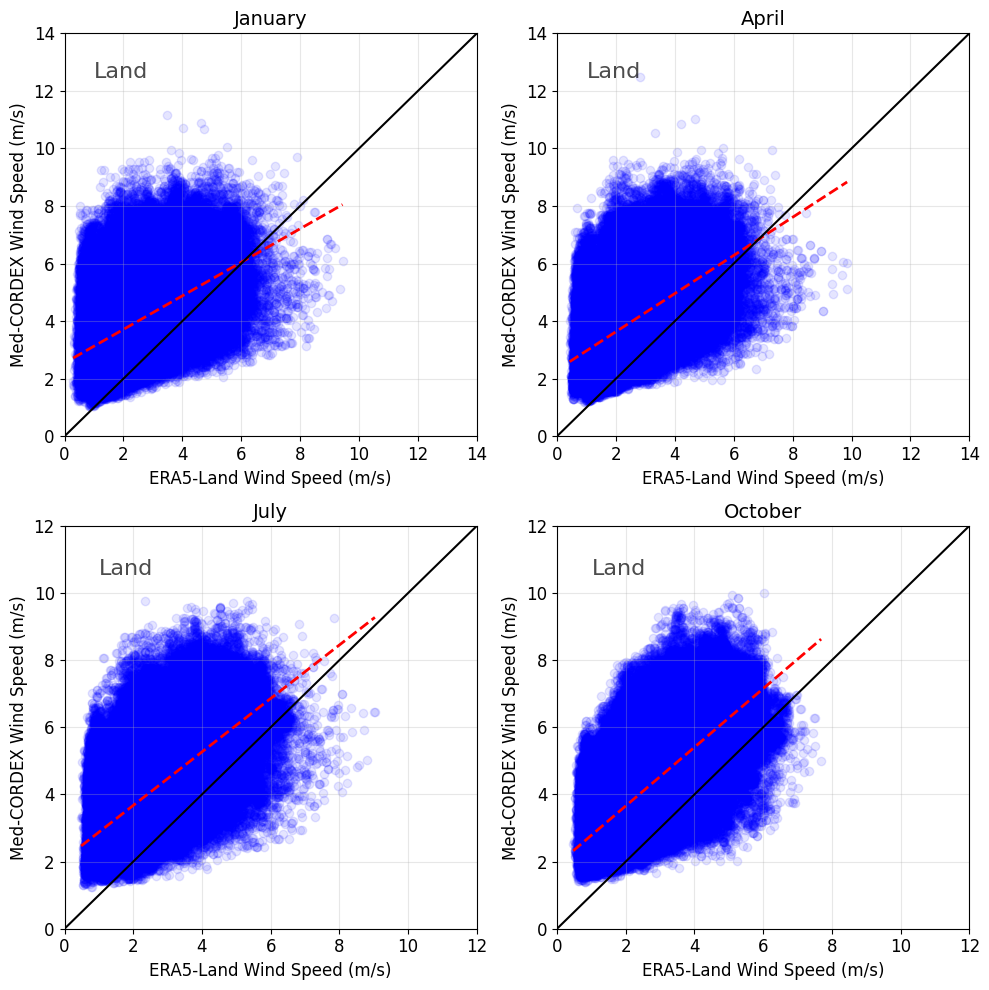

In [5]:

# Define seasons and corresponding temperature data
seasons = ['January', 'April', 'July', 'October']
era5land_temps = [vn_era5land_1_m, vn_era5land_2_m, vn_era5land_3_m, vn_era5land_4_m]
medcordex_temps = [vn_medcordex_remap_1_m, vn_medcordex_remap_2_m, 
                   vn_medcordex_remap_3_m, vn_medcordex_remap_4_m]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # Create 2x2 subplots
axes = axes.flatten()  # Flatten to loop over easily

for i, season in enumerate(seasons):
    # Create DataFrame
    df = pd.DataFrame({'ERA5-Land Wind Speed (m/s)': era5land_temps[i].flatten(), 
                       'Med-CORDEX Wind Speed (m/s)': medcordex_temps[i].flatten()})
    
    # Remove NaNs
    df = df.dropna()

    # Compute xlim and ylim dynamically
    x_min, x_max = df['ERA5-Land Wind Speed (m/s)'].min(), df['ERA5-Land Wind Speed (m/s)'].max()
    y_min, y_max = df['Med-CORDEX Wind Speed (m/s)'].min(), df['Med-CORDEX Wind Speed (m/s)'].max()

    def round_to_nearest_5(value):
        return round(value / 2) * 2
    
    x_min = round_to_nearest_5(x_min)
    x_max = round_to_nearest_5(x_max)
    y_min = round_to_nearest_5(y_min)
    y_max = round_to_nearest_5(y_max)
    

    # Ensure symmetry in axes for fair comparison
    min_limit = 0
    max_limit = max(x_max, y_max) + 2

    # Scatter plot
    axes[i].scatter(df['ERA5-Land Wind Speed (m/s)'], df['Med-CORDEX Wind Speed (m/s)'], 
                    color='blue', alpha=0.1)

    # Fit regression model
    X = df['ERA5-Land Wind Speed (m/s)'].values.reshape(-1, 1)
    y = df['Med-CORDEX Wind Speed (m/s)'].values

    reg_model = LinearRegression()
    reg_model.fit(X, y)

    # Generate extended X values
    X_extended = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_extended = reg_model.predict(X_extended)

    # Plot regression line
    axes[i].plot(X_extended, y_extended, color='red', linewidth=2, linestyle='--')

    # Reference 1:1 line (dynamically adjusted)
    axes[i].plot([min_limit, max_limit], [min_limit, max_limit], color='black', linewidth=1.5)

    # Labels and titles
    axes[i].set_xlabel('ERA5-Land Wind Speed (m/s)', fontsize=12)
    axes[i].set_ylabel('Med-CORDEX Wind Speed (m/s)', fontsize=12)
    axes[i].set_title(season, fontsize=14)

    # Adjust ticks
    axes[i].tick_params(axis='both', labelsize=12)

    # Set limits dynamically
    axes[i].set_xlim(min_limit, max_limit)
    axes[i].set_ylim(min_limit, max_limit)

    # Grid
    axes[i].grid(True, linestyle='-', alpha=0.3)
    axes[i].text(min_limit + 1, max_limit - 1, 'Land', fontsize=16, color='black', ha='left', va='top', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()


In [6]:
############################################ Input #######################################
data_era5="/work/cmcc/vr25423/Project/AdriaClimPlus/data/data_ERA5/processed"
data_medcordex="/work/cmcc/vr25423/Project/AdriaClimPlus/data/data_MEDCORDEX/processed_SSP245_ERA5"
lsm_f = open_ncfile("/work/cmcc/vr25423/Project/AdriaClimPlus/data/data_ERA5/downloaded/land_sea_mask.nc","r")
##########################################################################################

In [7]:
######################### Temperature ############################
yr_v = ['1985','1986','1987','1988','1989','1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
        '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
        '2010', '2011', '2012', '2013', '2014']

lsm=lsm_f.variables["lsm"][0,:,:] # 0 --> sea, above zero --> land.

vn_era5_1_m = []
vn_era5_2_m = []
vn_era5_3_m = []
vn_era5_4_m = []
vn_medcordex_remap_1_m = []
vn_medcordex_remap_2_m = []
vn_medcordex_remap_3_m = []
vn_medcordex_remap_4_m = []

for year in yr_v:
    ### 1 ###
    vn_era5 = open_ncfile(str(data_era5)+"/ERA5_"+str(year)+"_vn_1.nc","r")
    vn_medcordex = open_ncfile(str(data_medcordex)+"/MEDCORDEX_"+str(year)+"_vn_remap_1.nc","r")
    vn_era5_1 = vn_era5.variables["vn"][0,:,:]
    vn_era5_1 = np.where(lsm >=0.1, np.nan, vn_era5_1) #
    vn_era5_1_m.append(vn_era5_1)
    vn_medcordex_1=vn_medcordex.variables["vn"][0,:,:]
    vn_medcordex_1 = np.where(lsm >=0.1, np.nan, vn_medcordex_1)  #
    vn_medcordex_remap_1_m.append(np.where(np.isnan(vn_era5_1), np.nan, vn_medcordex_1))
    
    
    ### 2 ###
    vn_era5 = open_ncfile(str(data_era5)+"/ERA5_"+str(year)+"_vn_2.nc","r")
    vn_medcordex = open_ncfile(str(data_medcordex)+"/MEDCORDEX_"+str(year)+"_vn_remap_2.nc","r")
    vn_era5_2 = vn_era5.variables["vn"][0,:,:]
    vn_era5_2 = np.where(lsm >=0.1, np.nan, vn_era5_2) #
    vn_era5_2_m.append(vn_era5_2)
    vn_medcordex_2=vn_medcordex.variables["vn"][0,:,:]
    vn_medcordex_2 = np.where(lsm >=0.1, np.nan, vn_medcordex_2)  #
    vn_medcordex_remap_2_m.append(np.where(np.isnan(vn_era5_2), np.nan,vn_medcordex_2))
    
    ### 3 ###
    vn_era5 = open_ncfile(str(data_era5)+"/ERA5_"+str(year)+"_vn_3.nc","r")
    vn_medcordex = open_ncfile(str(data_medcordex)+"/MEDCORDEX_"+str(year)+"_vn_remap_3.nc","r")
    vn_era5_3 = vn_era5.variables["vn"][0,:,:]
    vn_era5_3 = np.where(lsm >=0.1, np.nan, vn_era5_3) #
    vn_era5_3_m.append(vn_era5_3)
    vn_medcordex_3=vn_medcordex.variables["vn"][0,:,:]
    vn_medcordex_3 = np.where(lsm >=0.1, np.nan, vn_medcordex_3)  #
    vn_medcordex_remap_3_m.append(np.where(np.isnan(vn_era5_3), np.nan,vn_medcordex_3))
    
    
    ### 4 ###
    vn_era5 = open_ncfile(str(data_era5)+"/ERA5_"+str(year)+"_vn_4.nc","r")
    vn_medcordex = open_ncfile(str(data_medcordex)+"/MEDCORDEX_"+str(year)+"_vn_remap_4.nc","r")
    vn_era5_4 = vn_era5.variables["vn"][0,:,:]
    vn_era5_4 = np.where(lsm >=0.1, np.nan, vn_era5_4) #
    vn_era5_4_m.append(vn_era5_4)
    vn_medcordex_4=vn_medcordex.variables["vn"][0,:,:]
    vn_medcordex_4 = np.where(lsm >=0.1, np.nan, vn_medcordex_4)  #
    vn_medcordex_remap_4_m.append(np.where(np.isnan(vn_era5_4), np.nan,vn_medcordex_4))

vn_era5_1_m = np.array(vn_era5_1_m).flatten()
vn_era5_2_m = np.array(vn_era5_2_m).flatten()
vn_era5_3_m = np.array(vn_era5_3_m).flatten()
vn_era5_4_m = np.array(vn_era5_4_m).flatten()

vn_medcordex_remap_1_m = np.array(vn_medcordex_remap_1_m).flatten()
vn_medcordex_remap_2_m = np.array(vn_medcordex_remap_2_m).flatten()
vn_medcordex_remap_3_m = np.array(vn_medcordex_remap_3_m).flatten()
vn_medcordex_remap_4_m = np.array(vn_medcordex_remap_4_m).flatten()

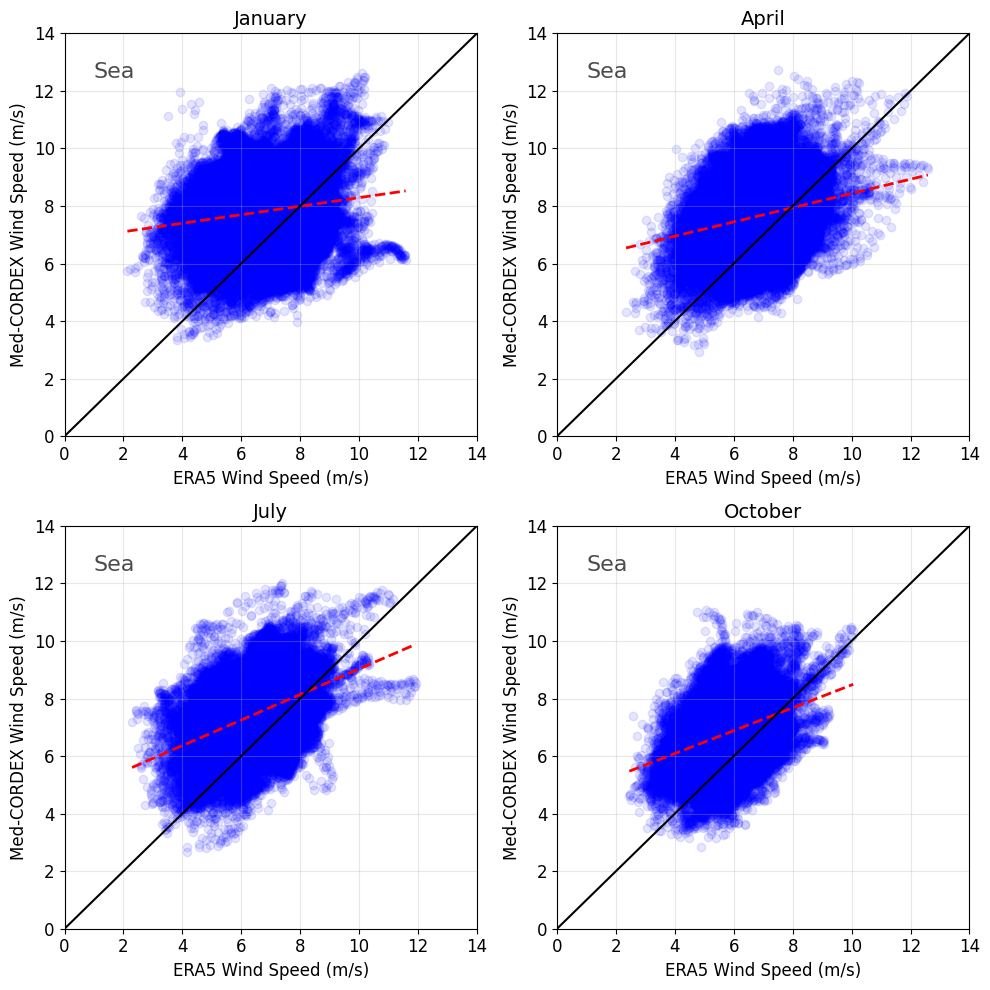

In [8]:

# Define seasons and corresponding temperature data
seasons = ['January', 'April', 'July', 'October']
era5_temps = [vn_era5_1_m, vn_era5_2_m, vn_era5_3_m, vn_era5_4_m]
medcordex_temps = [vn_medcordex_remap_1_m, vn_medcordex_remap_2_m, 
                   vn_medcordex_remap_3_m, vn_medcordex_remap_4_m]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # Create 2x2 subplots
axes = axes.flatten()  # Flatten to loop over easily

for i, season in enumerate(seasons):
    # Create DataFrame
    df = pd.DataFrame({'ERA5 Wind Speed (m/s)': era5_temps[i].flatten(), 
                       'Med-CORDEX Wind Speed (m/s)': medcordex_temps[i].flatten()})
    
    # Remove NaNs
    df = df.dropna()

    # Compute xlim and ylim dynamically
    x_min, x_max = df['ERA5 Wind Speed (m/s)'].min(), df['ERA5 Wind Speed (m/s)'].max()
    y_min, y_max = df['Med-CORDEX Wind Speed (m/s)'].min(), df['Med-CORDEX Wind Speed (m/s)'].max()

    def round_to_nearest_5(value):
        return round(value / 2) * 2
    
    x_min = round_to_nearest_5(x_min)
    x_max = round_to_nearest_5(x_max)
    y_min = round_to_nearest_5(y_min)
    y_max = round_to_nearest_5(y_max)
    

    # Ensure symmetry in axes for fair comparison
    min_limit = 0
    max_limit = max(x_max, y_max) + 2

    # Scatter plot
    axes[i].scatter(df['ERA5 Wind Speed (m/s)'], df['Med-CORDEX Wind Speed (m/s)'], 
                    color='blue', alpha=0.1)

    # Fit regression model
    X = df['ERA5 Wind Speed (m/s)'].values.reshape(-1, 1)
    y = df['Med-CORDEX Wind Speed (m/s)'].values

    reg_model = LinearRegression()
    reg_model.fit(X, y)

    # Generate extended X values
    X_extended = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_extended = reg_model.predict(X_extended)

    # Plot regression line
    axes[i].plot(X_extended, y_extended, color='red', linewidth=2, linestyle='--')

    # Reference 1:1 line (dynamically adjusted)
    axes[i].plot([min_limit, max_limit], [min_limit, max_limit], color='black', linewidth=1.5)

    # Labels and titles
    axes[i].set_xlabel('ERA5 Wind Speed (m/s)', fontsize=12)
    axes[i].set_ylabel('Med-CORDEX Wind Speed (m/s)', fontsize=12)
    axes[i].set_title(season, fontsize=14)

    # Adjust ticks
    axes[i].tick_params(axis='both', labelsize=12)

    # Set limits dynamically
    axes[i].set_xlim(min_limit, max_limit)
    axes[i].set_ylim(min_limit, max_limit)

    # Grid
    axes[i].grid(True, linestyle='-', alpha=0.3)
    axes[i].text(min_limit + 1, max_limit - 1, 'Sea', fontsize=16, color='black', ha='left', va='top', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()
